# **TP Wavelets - Jean Sainte-Beuve / Chloé Court**

In this TP, we will work on some fundamental concepts in Wavelets and compression of images.

First we'll briefly check the limitations of the Fourier transform. We'll then check some fundamental properties of a family of Wavelets and compute the Wavelet transform of a very simple signal. In the second part of the TP, we will use the DWT to compress and image.

Make sure to sequentially run all the cells in each section, so that the intermediate variables / packages will carry over to the next cell

We recommend you save a copy of this colab in your drive so you don't lose progress!

**Note 1:** As mentioned in the course and since there's not any policy regarding ChatGPT at Télécom level yet, you can use it. However, using ChatGPT without understanding their outputs is not OK, and will be penalized accordingly in your grade. Please be sure of all the functions you'll use.

**Note 2:** Several points have associated questions. When answering these questions, all responses should be properly justified. ChatGPT answers are very easy to spot.

**Note 3:** Always plot the functions and outputs you're generating. If the output or function is not properly plotted/shown, this will reduce points in your grade.

# Setup
First, we install PyWavelets

In [3]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
pywt.__version__
from scipy.signal import convolve
from scipy.fft import fftfreq
import cv2
from tabulate import tabulate

# Limitation of the Fourier Transform
*   Create a sinusoidal signal of 2.5 seconds of duration.
*   Set up a sampling rate of 20kHz. The signal should be divided in 5 parts of 0.5 seconds of duration each.
*  The signal should have the following frequencies in this order {10 Hz, 30 Hz, 60 Hz, 30 Hz, 10 Hz}.

In [7]:
duration = 2.5
sampling_rate = 20000 
frequencies = [10, 30, 60, 30, 10] 

signal = []
t = np.linspace(0, duration/5, int(sampling_rate * duration/5), endpoint=False)

for frequency in frequencies:
    signal = np.concatenate((signal,  np.sin(2 * np.pi * frequency * t)), axis=None)

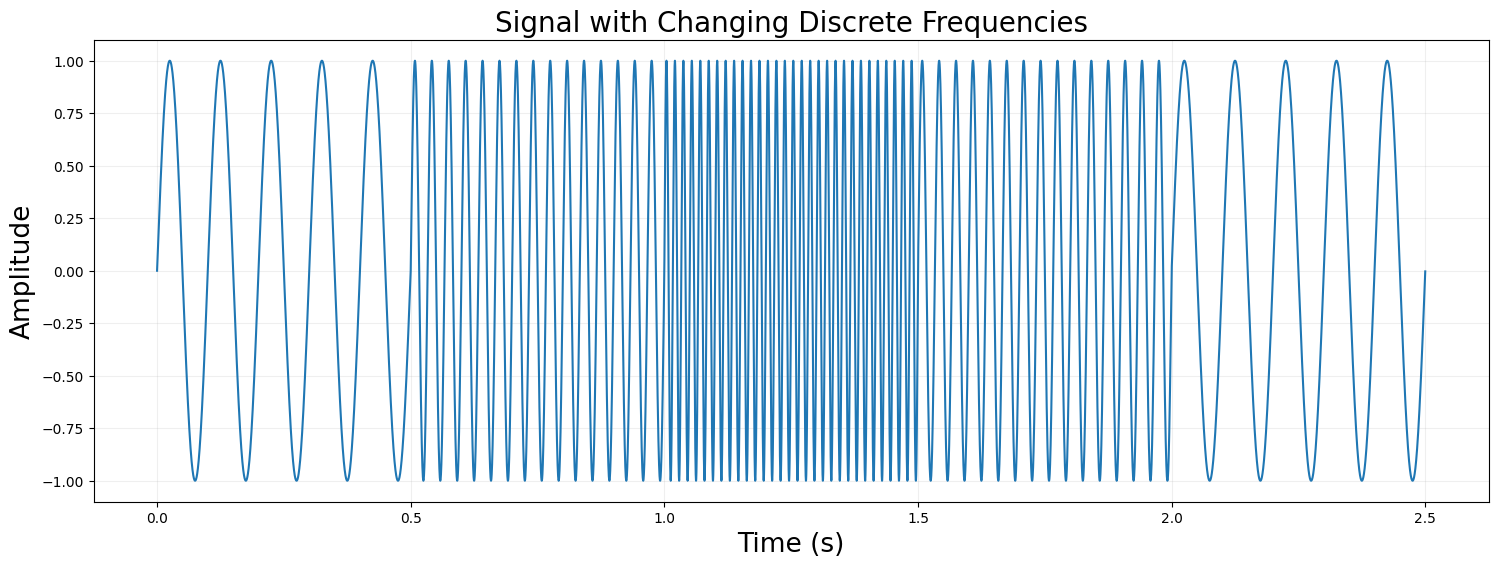

In [9]:
font_size = 20

plt.figure(figsize=(18, 6))

t_tot = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
plt.plot(t_tot, signal, linewidth=1.5)
plt.title('Signal with Changing Discrete Frequencies', fontsize=font_size)
plt.xlabel('Time (s)', fontsize=font_size-1)
plt.ylabel('Amplitude', fontsize=font_size-1)
plt.grid(alpha=0.2)

Now, you should compute the Discrete Fourier Transform of the signal. You can use any library from Python you prefer. You might need to cut the x-axis in the Fourier transform up to 100 Hz in the visualization. Please check https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html and https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

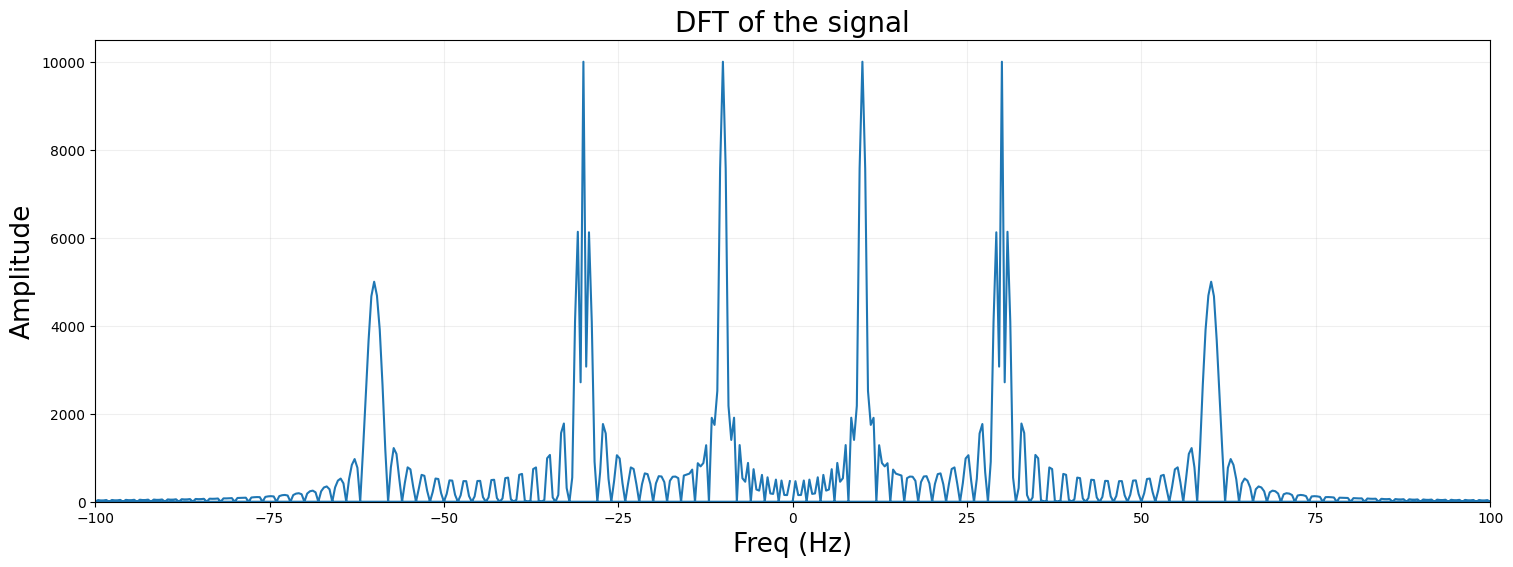

In [10]:
dft = np.abs(np.fft.fft(signal))

n = len(signal)
freq = np.fft.fftfreq(n, 1/sampling_rate)

plt.figure(figsize=(18, 6))
plt.plot(freq, dft, linewidth=1.5)
plt.title('DFT of the signal', fontsize=font_size)
plt.xlabel('Freq (Hz)', fontsize=font_size-1)
plt.ylabel('Amplitude', fontsize=font_size-1)
plt.xlim(-100,100)
plt.ylim(0)
plt.grid(alpha=0.2)

**QUESTIONS**

1) Does the established sampling rate satisfy the Nyquist-Shannon sampling theorem to avoid aliasing? Please justify.

2) What can you say from the signal looking **only** at the Fourier transform?

3) Can you be certain about the location of some frequency component in the time domain? Why?

**ANSWERS:**

1) The frequencies [10, 30, 60, 30, 10] are all way lower than $\frac{F_e}{2} = 10000$. Consequently, all sinusoides respect the Nyquist-Shannon sampling theorem. As we can see on the plot bellow, there is a considerable gain (that is due to the concatenation of the sinusoides with different phases). Though that gain is negligible above 1000Hz, so all the non-negligeable harmonics respect the Nyquist-Shannon sampling theorem.

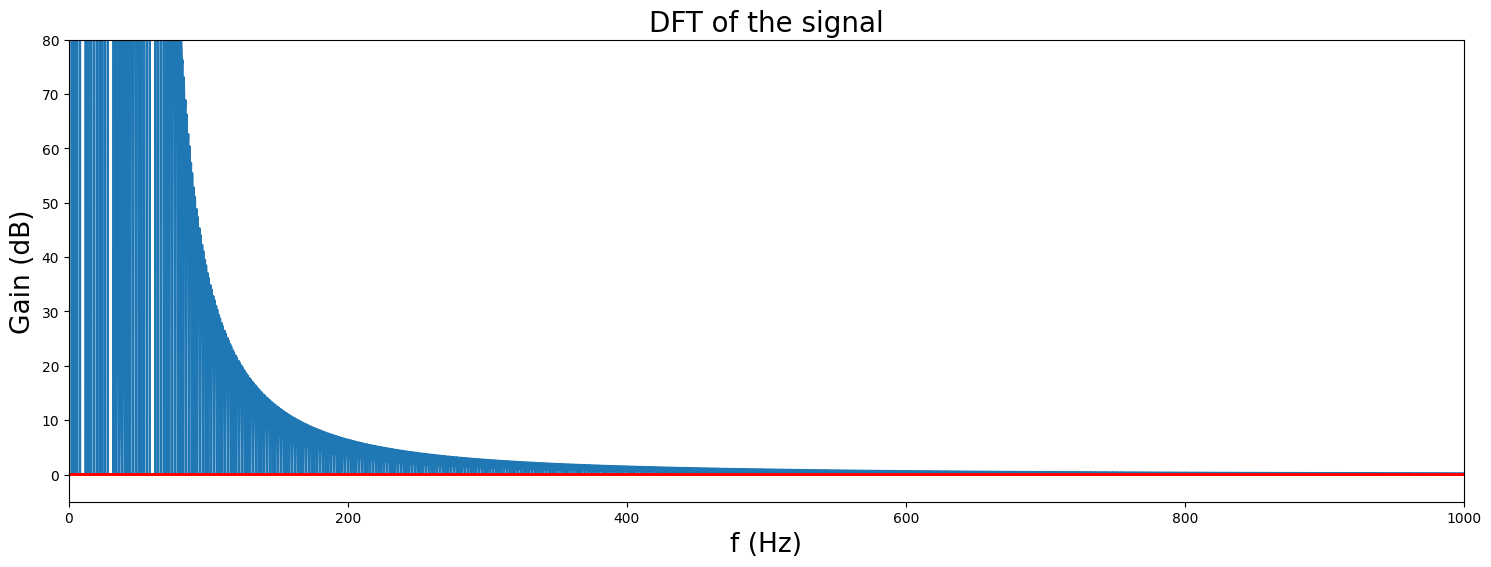

In [11]:
plt.figure(figsize=(18, 6))
plt.plot(freq,dft)
plt.plot(freq,np.zeros(n),"red")
plt.title('DFT of the signal', fontsize=font_size)
plt.xlabel('f (Hz)', fontsize=font_size-1)
plt.ylabel('Gain (dB)', fontsize=font_size-1)

# Set the limits
plt.xlim(0, 1000)
plt.ylim(-5,80)
plt.show()


2) Looking at the Fourier transform, we can say that the signal is continuous, so it is not harmonic. We can see clearly in the diagram the main frequencies of 10, 30 and 60 Hz. The phase shift can also be deduced from the DFT, as it is not a harmonic signal. Indeed, the continuity is due to that phase shift between the sinusoides.

3) No we can't be certain about the location of some frequency component in the time domain. Indeed, we took the whole signal for the fft so we can't have access to the location of some frequency in the time domain. If we wanted to have such informations we should have taken only a part of the signal with an unique frequency.


# **Mother Wavelet**
As we saw in the course, a wavelet is not just a function but a whole family of functions that satisfy certain requirements. In this part of the TP we're gonna work with the Morlet wavelet defined as follows: $\Psi(t)=k e^{iw_0t}e^{-\frac{1}{2}(\frac{t}{\sigma})^2}$. Please generate a Morlet wavelet in Python **WITHOUT using PyWavelets** with the following parameters:

-Center frequency of the wavelet = 10 Hz

-Sampling rate $\eta$ = 20000 Hz

-$k=\frac{1}{\sqrt{\eta}}$

-$\sigma = 0.1$

You can generate the wavelet between -1 and 1 seconds, so the time duration of the wavelet is 2 seconds. For this part, you just need to generate the real part of the wavelet.

Text(0, 0.5, 'Amplitude')

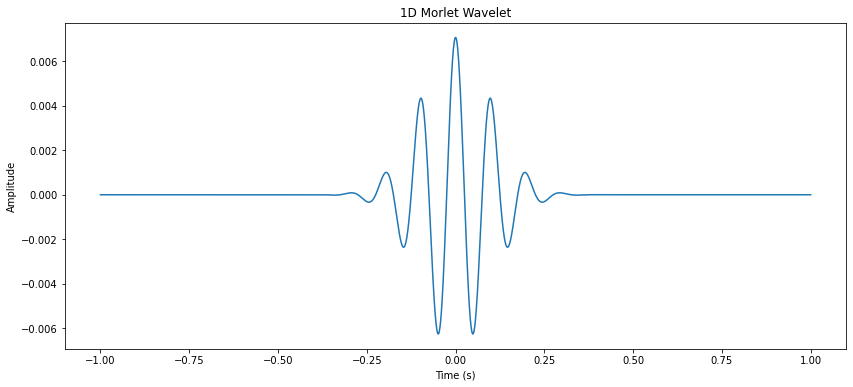

In [ ]:
#parameters
sampling_rate = 20000
k=1/np.sqrt(sampling_rate)
sigma=0.1
w0=2*np.pi*10

time = np.linspace(-1, 1, int(sampling_rate * 2), endpoint=False)
psi=[]
for t in time:
    psi.append(k * np.exp(1j * w0 * t) * np.exp(-1/2 * (t/sigma)**2))

# Plot the real part of the Morlet wavelet in 1D
plt.figure(figsize=(14, 6))
plt.plot(time, np.real(np.array(psi)))
plt.title('1D Morlet Wavelet')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Please show that the mother wavelet we just created satisfies the admissibility and the finite energy conditions:

**Admissibility :**

In [ ]:
print(np.trapz(np.real(np.array(psi)), time))

4.741824514738588e-12


> The integral of the mother wavelet is negligible, which proves the admissibility.

**Finite energy conditions :**

In [ ]:
print(np.trapz(np.abs(np.real(np.array(psi))**2), time))

4.43113462726379e-06


> The energy is finite.

**Note:** In real life, you have to deal with finite-precision related problems. Therefore, if for the admissibility condition you don't have exactly the value you were expecting for, don't worry.

# **Convolution**

As we saw in the course, we need a measure of similarity to compute the wavelet transform. We also saw that we can easily compute the shift in time and similarity calculation with the 1-D convolutions.

* Generate a chirp sinusoidal signal from -5 to 5 seconds with an initial frequency of 5 Hz and final frequency of 15 Hz and sampling rate of 20kHz:

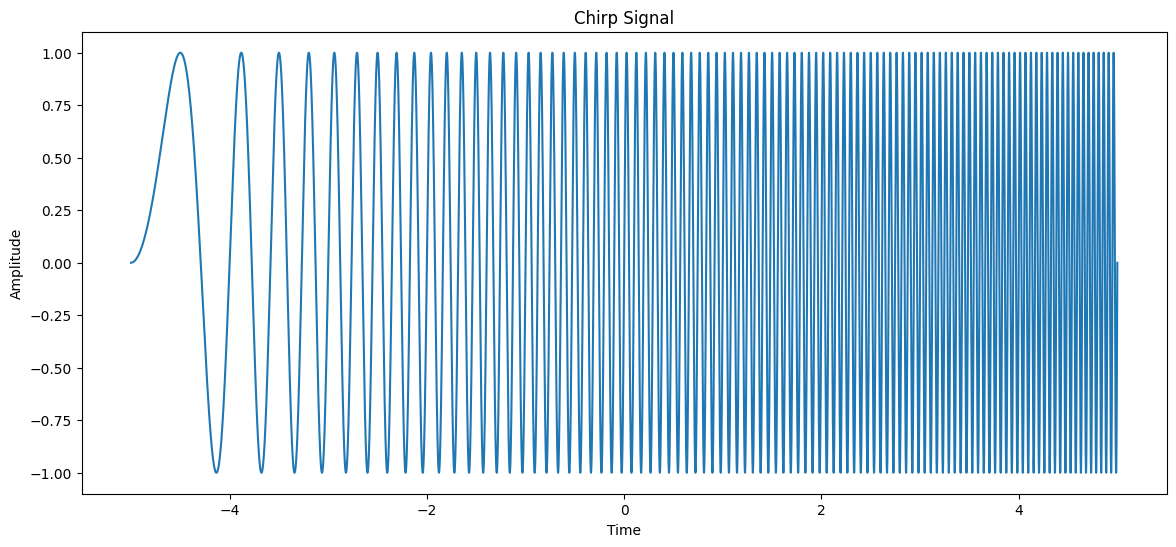

In [12]:
# Parameters
start = -5
end = 5
f0 = 5
f1 = 15
sampling_rate = 20000

time_signal = np.linspace(start, end, int((end - start) * sampling_rate))
chirp_signal = np.sin(2 * np.pi *np.linspace(f0, f1,len(time_signal)) * time_signal)

plt.figure(figsize=(14, 6))
plt.plot(time_signal, chirp_signal)
plt.title('Chirp Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')

plt.show()

Now create a Morlet wavelet with the following parameters:

* Center frequency of the wavelet = 10 Hz

* Sampling rate $\eta$ = 20000 Hz

* $k=\frac{1}{\sqrt{\eta}}$
* $\sigma = 0.2$

Text(0.5, 0, 'Time')

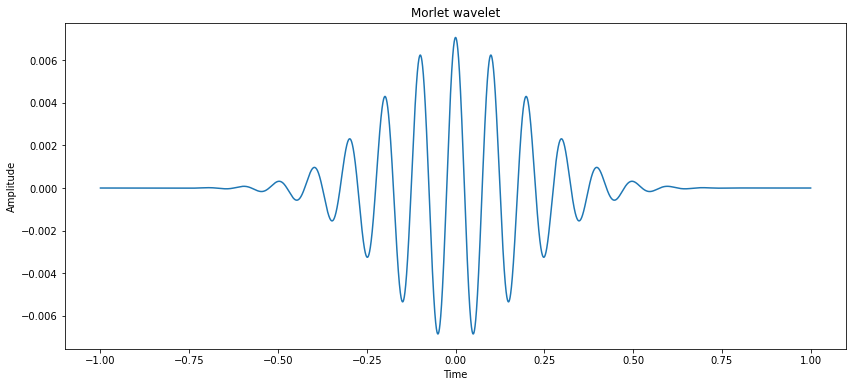

In [ ]:
sigma = 0.2

time = np.linspace(-1, 1, int(sampling_rate * 2), endpoint=False)
morlet_wavelet=[]
for t in time:
    morlet_wavelet.append(k * np.exp(1j * w0 * t) * np.exp(-1/2 * (t/sigma)**2))

plt.figure(figsize=(14, 6))
plt.plot(time, np.real(morlet_wavelet))
plt.title('Morlet wavelet')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Compute the convolution between the chirp signal and $Re(\Psi(t))$. For reference on how to perform convolution with scipy 'convolve' function, please check https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

Text(0, 0.5, 'Amplitude')

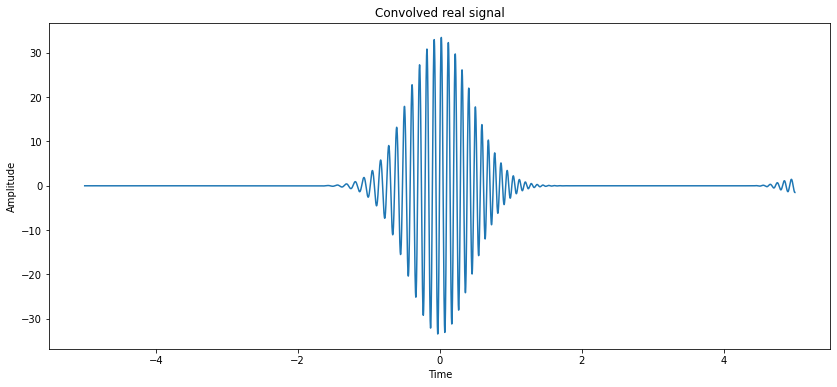

In [ ]:
convolved_signal_real = convolve(chirp_signal, np.real(morlet_wavelet), mode='same')

plt.figure(figsize=(14, 6))
plt.plot(time_signal, convolved_signal_real)
plt.title('Convolved real signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

There are some points where the convolution is zero, even in regions of high similarity between the wavelet and the signal. **Is this OK?** If it's not, propose a solution to that.

> The fact that the convolution is zero even in regions of high similarity between the wavelet and the signal is not OK, because it should not be null if it is similar. That can be explained by the fact that we only used the real part of the wavelet. A solution would be to also consider the imaginary part.

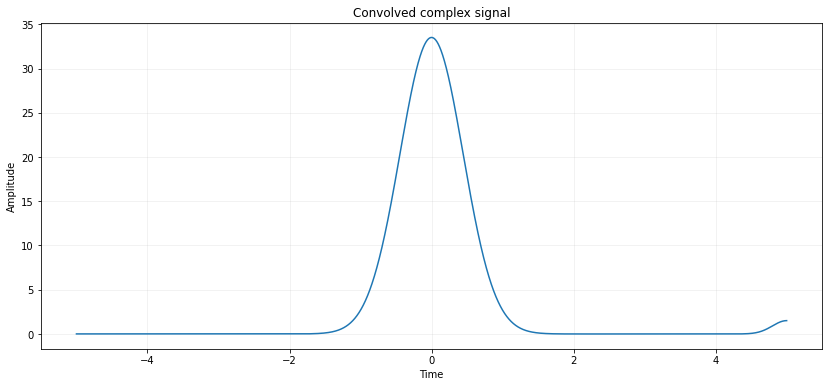

In [ ]:
convolved_signal_im = convolve(chirp_signal, np.imag(morlet_wavelet), mode='same')
convolved_signal = convolved_signal_real + 1j*convolved_signal_im

plt.figure(figsize=(14, 6))
plt.plot(time_signal, np.abs(convolved_signal))
plt.title('Convolved complex signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(alpha=0.2)

# **Image Compression**
For this part, we'll use the Discrete Wavelet Transform (DWT) implemented as a filter bank to do image compression. The first step is to have an image to compress. For doing so you can use the following piece of code to download an image of Trudy.

**Visualize image:** With the following code you can visualize the image. If you're using Google Collab, most probably you already have the open cv library installed. If you're using Jupyter Notebook for example, you'll have to install open cv if it's not already installed.

In [ ]:
# Let us define a function for visualizing images
def show_image(image, title='Input Image', font_size=12,fig_size = (10, 10)):
  #A function that uses matplotlib to show grayscale images
  plt.figure(figsize=fig_size)
  plt.imshow(image, cmap='gray')
  plt.title(title, fontsize=font_size)
  plt.axis('off')

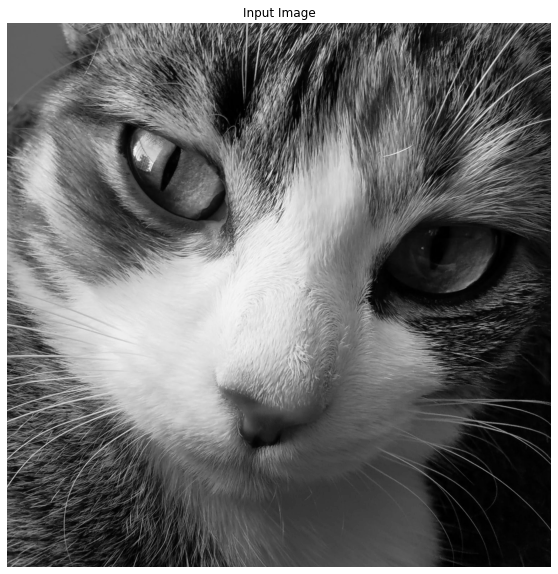

In [ ]:
# Load your image as a grayscale
input_image = cv2.imread('Trudy_for_compression.jpeg', cv2.IMREAD_GRAYSCALE)
# Display the original image
show_image(input_image, 'Input Image')

If you use some wavelet function (Biorthogonal 1.3 in this case), the 1-level 2D wavelet decomposition of our input image is given as follows:

In [ ]:
# # You can see a list of wavelet families
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [ ]:
# For each family, you can list the available wavelets
pywt.wavelist(family='bior', kind='all')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8']

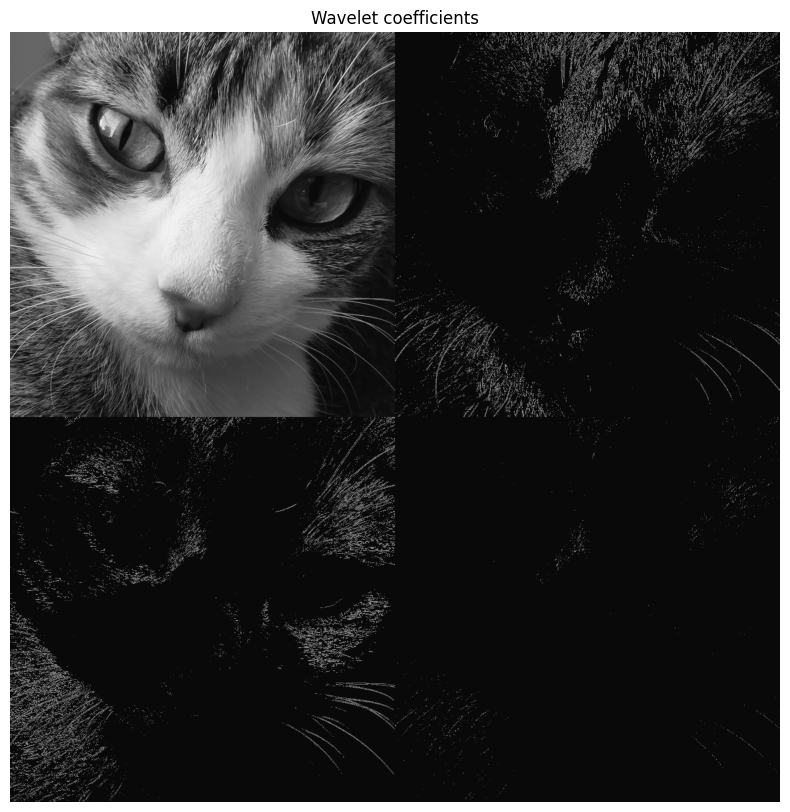

In the previous image we applied a threshold in the wavelet coefficients for visualization purposes. **Please explain the meaning of each of these 4 images**.

> This is a multilevel wavelet decomposition in images. The first image is the original image. The image next to it is the image obtained by convolving (so filtering) horizontally the image sequentially with the wavelet and a threshold. We see that the vertical discontinuities are mostly detected. The third image corresponds to a vertical convolution. In the opposite, the horizontal discontinuities are detected. The last one corresponds to a diagonal convolution. It can be useful for example to delete the noise in a image, by avoiding high frequencies, if we take a high frequency wavelet.

Now, you should compute the six-levels 2D wavelet decomposition of the input image with a Daubechies wavelet with six vanishing moments using the PyWavelet library. Please check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

wavelet = 'db6'
level = 6
coeffs = pywt.wavedec2(input_image, wavelet, level=level)

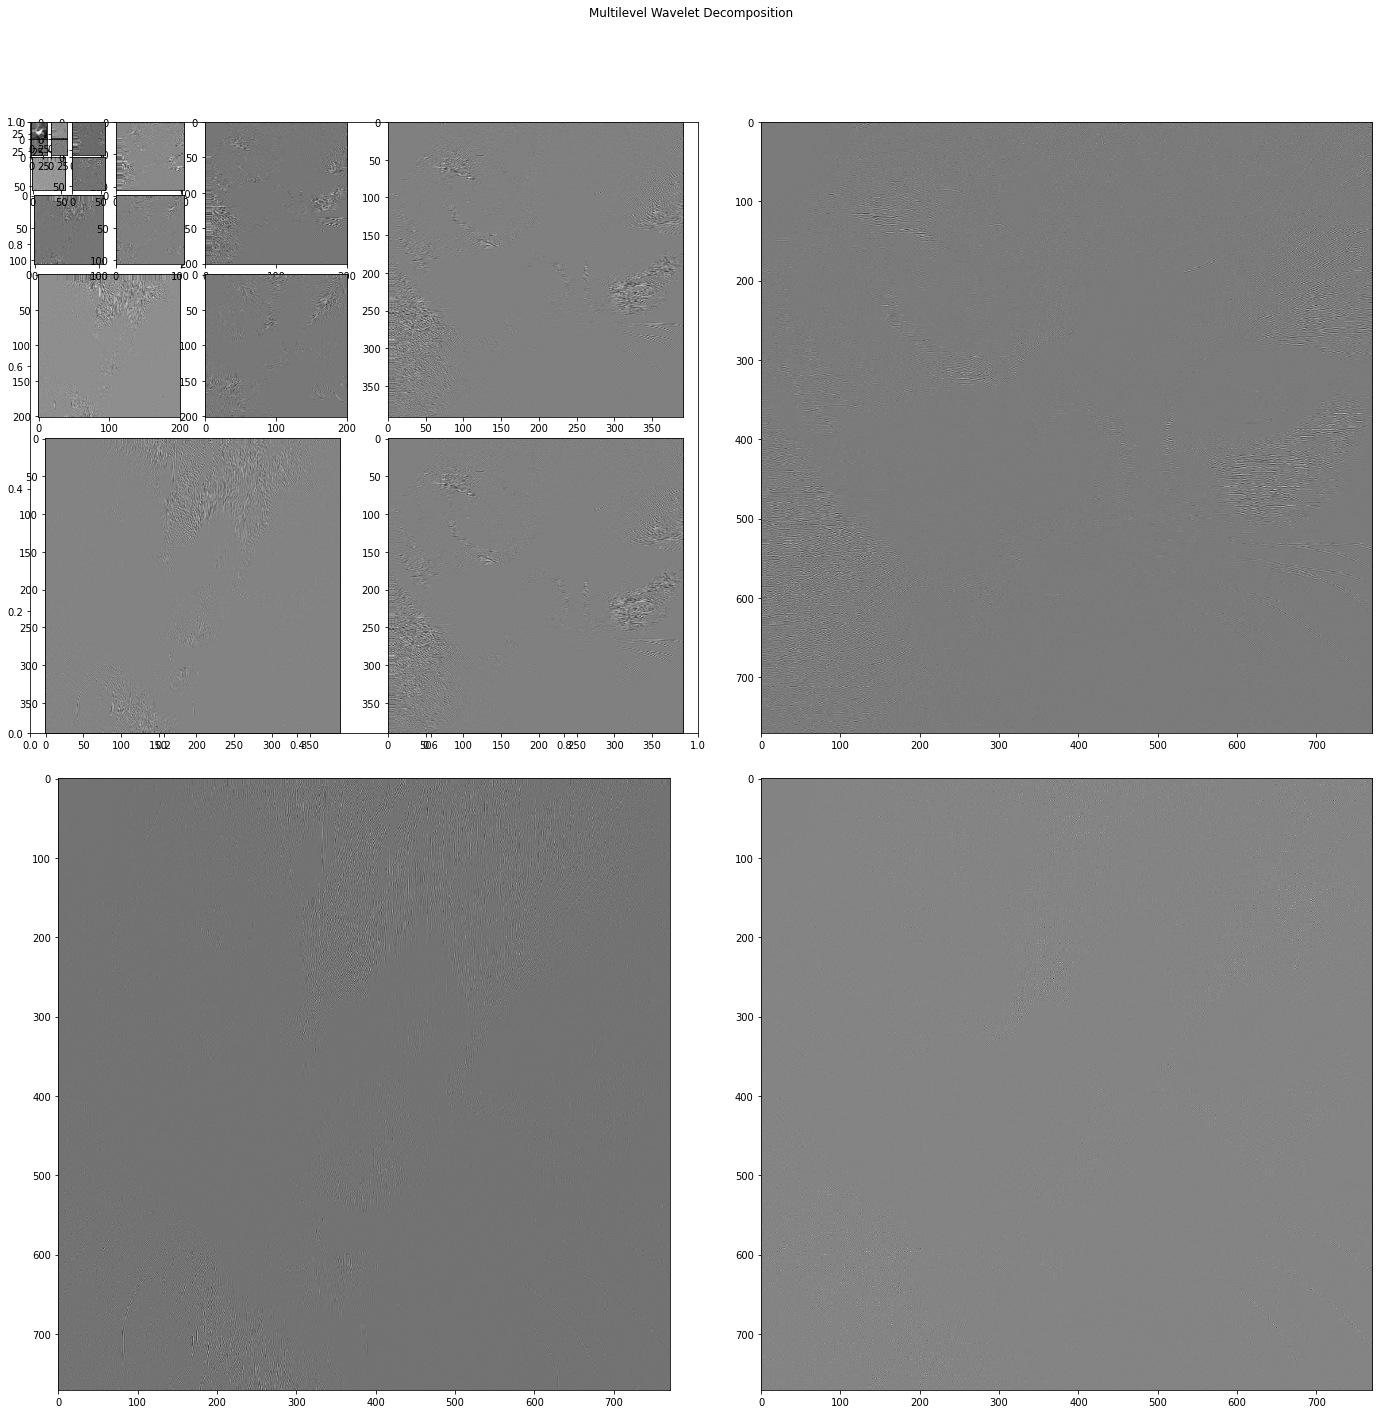

In [ ]:
aaaaaa,(aaaaah,aaaaav,aaaaad),(aaaah,aaaav,aaaad),(aaah,aaav,aaad),(aah,aav,aad),(ah,av,ad),(h, v, d) = coeffs

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Multilevel Wavelet Decomposition')
axes[0][1].imshow(h,cmap='gray')
axes[1][0].imshow(v,cmap='gray')
axes[1][1].imshow(d,cmap='gray')

gs = fig.add_gridspec(2, 2)
inner_grid = gs[0, 0].subgridspec(2, 2)
axes_01 = fig.add_subplot(inner_grid[0, 1])
axes_01.imshow(ah, cmap='gray')
axes_10 = fig.add_subplot(inner_grid[1, 0])
axes_10.imshow(av, cmap='gray')
axes_11 = fig.add_subplot(inner_grid[1, 1])
axes_11.imshow(ah, cmap='gray')

inner_grid = inner_grid[0, 0].subgridspec(2, 2)
axes_01 = fig.add_subplot(inner_grid[0, 1])
axes_01.imshow(aah, cmap='gray')
axes_10 = fig.add_subplot(inner_grid[1, 0])
axes_10.imshow(aav, cmap='gray')
axes_11 = fig.add_subplot(inner_grid[1, 1])
axes_11.imshow(aad, cmap='gray')

inner_grid = inner_grid[0, 0].subgridspec(2, 2)
axes_01 = fig.add_subplot(inner_grid[0, 1])
axes_01.imshow(aaah, cmap='gray')
axes_10 = fig.add_subplot(inner_grid[1, 0])
axes_10.imshow(aaav, cmap='gray')
axes_11 = fig.add_subplot(inner_grid[1, 1])
axes_11.imshow(aaad, cmap='gray')

inner_grid = inner_grid[0, 0].subgridspec(2, 2)
axes_01 = fig.add_subplot(inner_grid[0, 1])
axes_01.imshow(aaaah, cmap='gray')
axes_10 = fig.add_subplot(inner_grid[1, 0])
axes_10.imshow(aaaav, cmap='gray')
axes_11 = fig.add_subplot(inner_grid[1, 1])
axes_11.imshow(aaaad, cmap='gray')

inner_grid = inner_grid[0, 0].subgridspec(2, 2)
axes_01 = fig.add_subplot(inner_grid[0, 1])
axes_01.imshow(aaaaah, cmap='gray')
axes_10 = fig.add_subplot(inner_grid[1, 0])
axes_10.imshow(aaaaav, cmap='gray')
axes_11 = fig.add_subplot(inner_grid[1, 1])
axes_11.imshow(aaaaad, cmap='gray')
axes_00 = fig.add_subplot(inner_grid[0,0])
axes_00.imshow(aaaaaa, cmap='gray')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

* Set a threshold of value of 100 and take to zero the values less than that in the 2D wavelet decomposition. **Note:** You should only threshold the outputs of the high-pass filters.



In [ ]:
data = coeffs[0]
details = coeffs[1:]

for i in range(len(details)):
    details[i] = tuple(np.where(np.abs(details[i]) < 100, 0, details[i]))

modified_coeffs = (data, *details)

thresh_image = pywt.waverec2(modified_coeffs, wavelet)

* Compute the IDWT to reconstruct the image after the "compression". Check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-reconstruction-using-waverec2 as a reference.

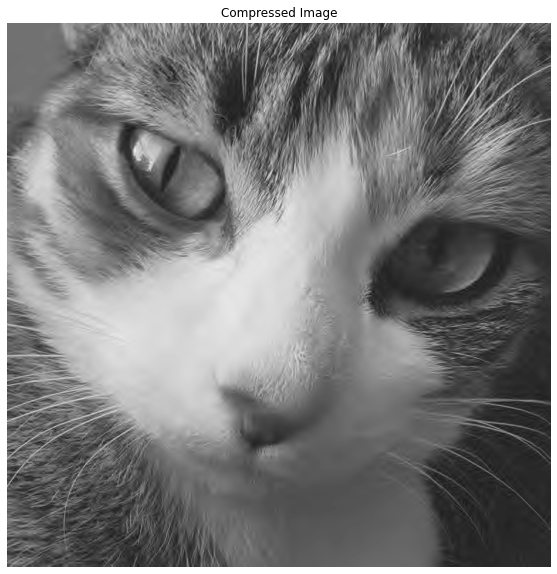

In [ ]:
compressed_image = pywt.waverec2(modified_coeffs, wavelet)

show_image(compressed_image, 'Compressed Image')


What's the compression ratio?

In [ ]:
original_image_size = np.prod(input_image.shape) * input_image.dtype.itemsize

flattened_coeffs = np.concatenate([np.asarray(arr).flatten() for arr in modified_coeffs])

non_zero_coefficients = np.sum(np.abs(flattened_coeffs) > 0)
compressed_size = non_zero_coefficients * flattened_coeffs.dtype.itemsize

compression_ratio = original_image_size / compressed_size

print("Compression Ratio:", compression_ratio)

Compression Ratio: 9.997152794353326


# **Putting everything together**

In this exercise we'll analyze the Peak Signal to Noise Ration (PSNR) of the compressed images for different thresholds. For doing so, we'll give you the function to compute the PSNR between the original and compressed image.

In [ ]:
def psnr(original_image, compressed_image):
    h,w = original_image.shape
    mse = np.sum(np.abs(original_image-compressed_image)**2)/(h*w)
    return 20* np.log10(255**2/mse)

Now, you have to create a function codec that receives the input image, the wavelet to be used, the number of levels, and the threshold value. This function returns the compressed image and the compression ratio. **Note:** You already did that previously.

In [ ]:
def codec(input_image,wavelet='db4',num_levels=6,threshold=100):
  coeffs = pywt.wavedec2(input_image, wavelet, level=num_levels)
  data = coeffs[0]
  details = coeffs[1:]

  for i in range(len(details)):
      details[i] = tuple(np.where(np.abs(details[i]) < threshold, 0, details[i]))
  modified_coeffs = (data, *details)
  
  original_image_size = np.prod(input_image.shape) * input_image.dtype.itemsize

  flattened_coeffs = np.concatenate([np.asarray(arr).flatten() for arr in modified_coeffs])

  non_zero_coefficients = np.sum(np.abs(flattened_coeffs) > 0)
  compressed_size = non_zero_coefficients * flattened_coeffs.dtype.itemsize

  compression_ratio = original_image_size / compressed_size
  return compression_ratio

Now, we compare the performance of the 'db4' and the 'bior1.3' wavelets in terms of compression ratio and PSNR for different thresholds.

In [ ]:
wavelet_1 = 'db4'
wavelet_2 = 'bior1.3'
thresholds = [5,10,20,40,80,100]
num_levels=6

table_data = []

table_data.append(["Wavelet", "Threshold", "Compression ratio"])
for threshold in thresholds :
    cr_1 = codec(input_image, wavelet_1, num_levels, threshold)
    cr_2 = codec(input_image, wavelet_2, num_levels, threshold)
    table_data.append([wavelet_1, threshold, cr_1])
    table_data.append([wavelet_2, threshold, cr_2])

print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

╒═══════════╤═════════════╤═════════════════════╕
│ Wavelet   │   Threshold │   Compression ratio │
╞═══════════╪═════════════╪═════════════════════╡
│ db4       │           5 │            0.46513  │
├───────────┼─────────────┼─────────────────────┤
│ bior1.3   │           5 │            0.346496 │
├───────────┼─────────────┼─────────────────────┤
│ db4       │          10 │            0.762407 │
├───────────┼─────────────┼─────────────────────┤
│ bior1.3   │          10 │            0.540583 │
├───────────┼─────────────┼─────────────────────┤
│ db4       │          20 │            1.44385  │
├───────────┼─────────────┼─────────────────────┤
│ bior1.3   │          20 │            0.978061 │
├───────────┼─────────────┼─────────────────────┤
│ db4       │          40 │            3.15648  │
├───────────┼─────────────┼─────────────────────┤
│ bior1.3   │          40 │            2.21328  │
├───────────┼─────────────┼─────────────────────┤
│ db4       │          80 │            7.69256  │


**QUESTIONS**

1) Which wavelet is better for the Trudy_for_compression.jpeg image and why?

> The db4 wavelet is better for the Trudy_for_compression.jpeg image as the results of the compression are better than for the bior1.3 wavelet for different thresholds.